In [1]:
# Import library yang diperlukan
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, plot_importance, plot_tree
import matplotlib.pyplot as plt
import shap
from sklearn.inspection import PartialDependenceDisplay

# Baca dataset
data = pd.read_csv("tugasxgboost2.csv", delimiter=';')  # Pisahkan data dengan delimiter yang sesuai

# Periksa isi dataset
print(data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

In [6]:
from sklearn.preprocessing import LabelEncoder

# Pisahkan fitur dan target
X = data.drop(columns=['quality'])  # Kolom fitur
y = data['quality']  # Kolom target

# Encoding target menjadi label numerik
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split dataset menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Menampilkan dimensi data latih dan uji
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (3918, 11)
Testing data shape: (980, 11)


In [2]:
# Pisahkan fitur dan target
X = data.drop(columns='quality')  # Fitur
y = data['quality']               # Target

# Pastikan target dalam format label numerik
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split dataset menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Latih model XGBoost
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:43:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [7]:
# Inisialisasi model XGBoost
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Melatih model pada data latih
model.fit(X_train, y_train)

# Menampilkan akurasi pada data uji
accuracy = model.score(X_test, y_test)
print(f"Accuracy on test data: {accuracy:.2f}")

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:46:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy on test data: 0.65


<Figure size 1000x800 with 0 Axes>

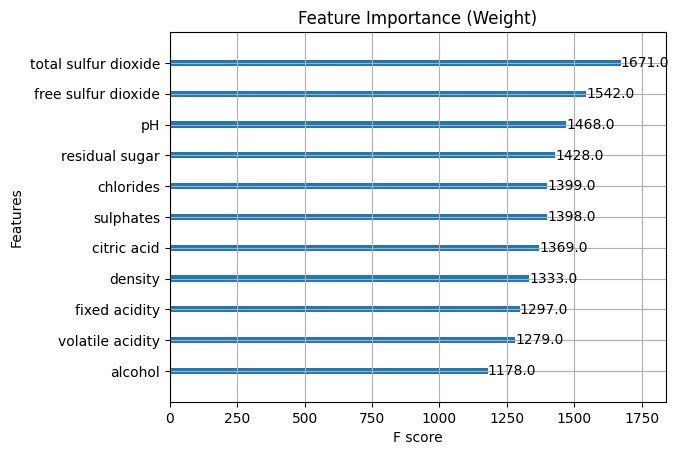

In [3]:
# Visualisasi Feature Importance
plt.figure(figsize=(10, 8))
plot_importance(model, importance_type='weight')
plt.title("Feature Importance (Weight)")
plt.show()

<Figure size 2000x1000 with 0 Axes>

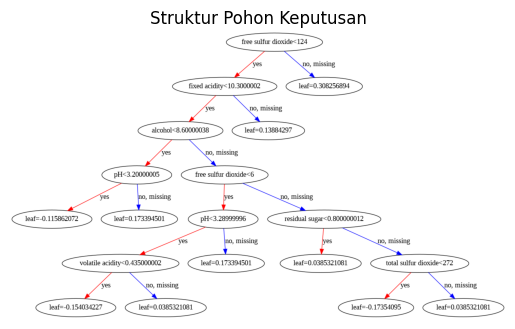

In [4]:
# Visualisasi Struktur Pohon
plt.figure(figsize=(20, 10))
plot_tree(model, num_trees=0)  # Visualisasikan pohon pertama
plt.title("Struktur Pohon Keputusan")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:49:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:49:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:49:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:49:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not use

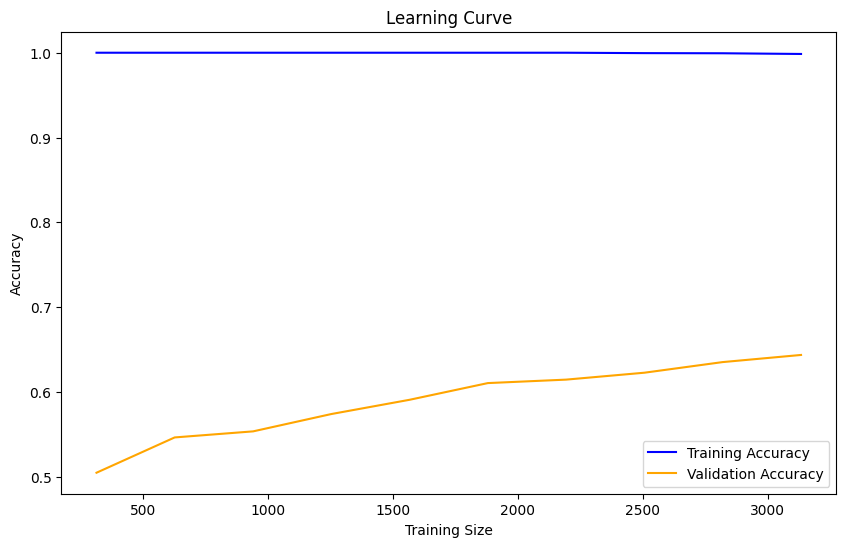

In [11]:
from sklearn.model_selection import learning_curve
import numpy as np

# Menghitung learning curve
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

# Rata-rata skor
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy', color='blue')
plt.plot(train_sizes, test_mean, label='Validation Accuracy', color='orange')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()

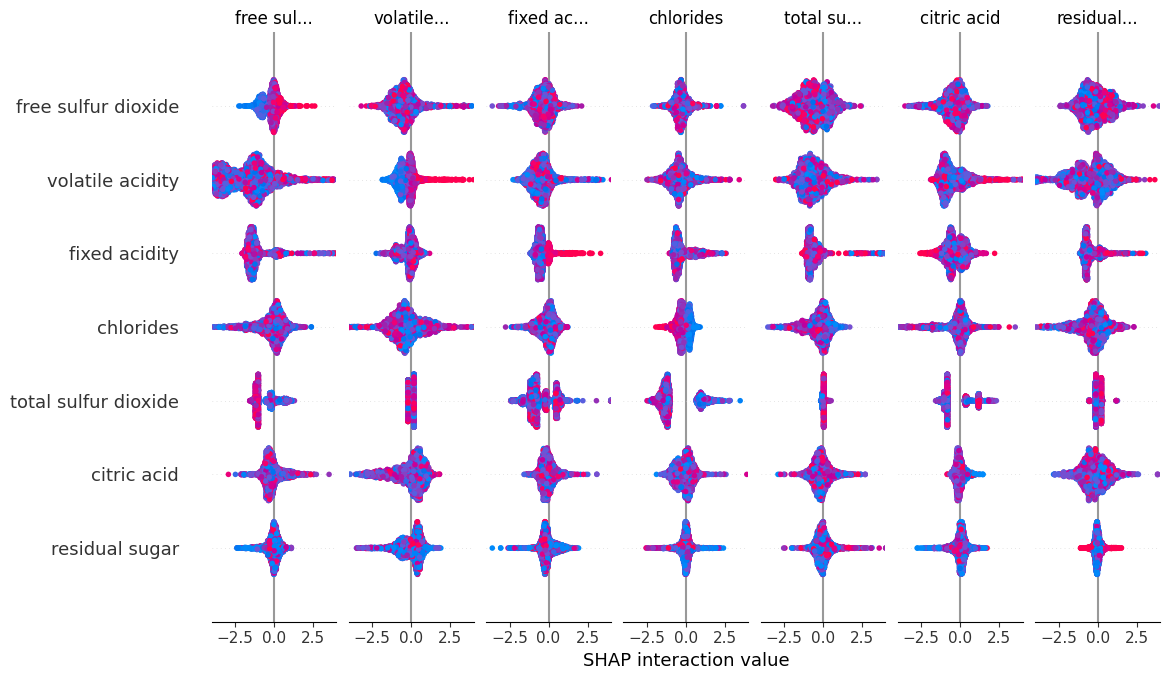

In [12]:
import shap

# Membuat objek SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# Visualisasi SHAP Summary
shap.summary_plot(shap_values, X_train)


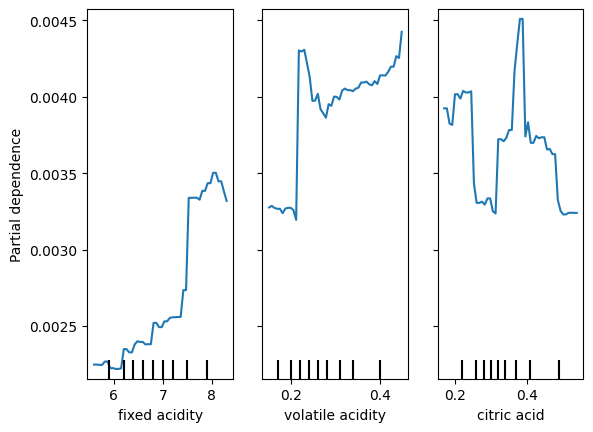

In [17]:
from sklearn.inspection import PartialDependenceDisplay

# Pilih kelas target yang ingin divisualisasikan (misal: kelas 0)
target_class = 0

# Membuat Partial Dependence Plot untuk beberapa fitur
features_to_plot = [0, 1, 2]  # Indeks fitur yang ingin dianalisis
PartialDependenceDisplay.from_estimator(
    model, X_train, features_to_plot,
    feature_names=X.columns,
    grid_resolution=50,
    target=target_class  # Menentukan target kelas
)

plt.show()